In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from nltk.stem import WordNetLemmatizer

## Dataset Description
-- train.csv: A full training dataset with the following attributes:

-- id: unique id for a news article

--  title: the title of a news article

-- author: author of the news article

-- text: the text of the article; could be incomplete

-- label: a label that marks the article as potentially unreliable
1: unreliable
0: reliable

-- test.csv: A testing training dataset with all the same attributes at train.csv without the label.

-- submit.csv: A sample submission that you can

In [2]:
dataset = pd.read_csv("C:\\Users\\Olamide\\Projects\\Fake News Dataset\\train.csv",index_col="id")
dataset.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
dataset.shape

(20800, 4)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 812.5+ KB


From the Dataset Information, We have 3 objects('strings) and one Integer feature.
with some existing Missing values

In [5]:
dataset.isnull().sum() ### We have Missing values in each feature aside the Label feature which identifies if a News is Fake or Not

title      558
author    1957
text        39
label        0
dtype: int64

--> Label:

 -- Fake News : 1
 
 -- real News : 0

### Handling the Missing Values in the feature by replacing the missing with an empty space

In [6]:
dataset[dataset['title'].isnull()]

,title,author,text,label
id,,,,
53,NaN,Dairy✓ᵀᴿᵁᴹᴾ,Sounds like he has our president pegged. What ...,1
120,NaN,Anonymous,"Same people all the time , i dont know how you...",1
124,NaN,SeekSearchDestory,"You know, outside of any morality arguments, i...",1
140,NaN,Anonymous,There is a lot more than meets the eye to this...,1
196,NaN,Raffie,They got the heater turned up on high.,1
...,...,...,...,...
20568,NaN,Cathy Milne,"Amusing comment Gary! “Those week!” So, are ...",1
20627,NaN,Ramona,"No she doesn’t have more money than God, every...",1
20636,NaN,Dave Lowery,Trump all the way!,1


In [20]:
dataset = dataset.fillna(" ") ### Handling Missing Value by replacing with a Space.

In [8]:
dataset.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64

In [9]:
dataset.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
dataset['label'].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

In [11]:
dataset['Title_Author'] = dataset['title'] + " " + dataset['author']
dataset['Title_Author']

id
0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799              What Keeps the F-35 Alive David Swanson
Name: Title_Author, Length: 20800, dtype: object

In [12]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### Seperating the feature variable and the Label variable

In [13]:
X = dataset.drop(['title','author','label','text'], axis=1)
Y = dataset['label']

In [14]:
x = X.values

#### Text Cleansing Using the Natural Languague Process libraries


In [15]:
stemmer = PorterStemmer()  ### Instantiating the Porterstemmer class for stemming
lemmer = WordNetLemmatizer() ### Lemmatization
bag_of_words = CountVectorizer() ### Bag of words

In [16]:
def stemmed_content(content):
    stemmed= re.sub('[^a-zA-Z]'," ", content)
    stemmed = stemmed.lower()
    stemmed = stemmed.split()
    stemmed = [stemmer.stem(word) for word in stemmed if word not in stopwords.words('english')]
    stemmed = " ".join(stemmed)
    return stemmed

In [17]:
def lemma_content(content):
    stemmed= re.sub('[^a-zA-Z]'," ", content)
    stemmed = stemmed.lower()
    stemmed = stemmed.split()
    stemmed = [lemmer.lemmatize(word) for word in stemmed if word not in stopwords.words('english')]
    stemmed = " ".join(stemmed)
    return stemmed

In [21]:
dataset['new_content'] = dataset['Title_Author'].apply(stemmed_content)
dataset['lemma_content'] = dataset['Title_Author'].apply(lemma_content)


In [19]:
dataset.head()

,title,author,text,label,Title_Author,new_content,lemma_content
id,,,,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,hous dem aid even see comey letter jason chaff...,house dem aide even see comey letter jason cha...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",flynn hillari clinton big woman campu breitbar...,flynn hillary clinton big woman campus breitba...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...,truth might get fire consortiumnew com,truth might get fired consortiumnews com
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...,civilian kill singl us airstrik identifi jessi...,civilian killed single u airstrike identified ...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...,iranian woman jail fiction unpublish stori wom...,iranian woman jailed fictional unpublished sto...


In [23]:
dataset['lemma_content'].head()

id
0    house dem aide even see comey letter jason cha...
1    flynn hillary clinton big woman campus breitba...
2             truth might get fired consortiumnews com
3    civilian killed single u airstrike identified ...
4    iranian woman jailed fictional unpublished sto...
Name: lemma_content, dtype: object

In [30]:
X = dataset['lemma_content']
Y = dataset['label']

In [27]:
### Converting the textual value into a numerical value

In [31]:
tfid = TfidfVectorizer()
X= tfid.fit_transform(dataset['lemma_content'])


In [34]:
X[1]

<1x21030 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [25]:
#### Splitting the Dataset using sklearn train_test_split function

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X_train.shape,Y_train.shape)

(16640, 21030) (16640,)


#### Model Building 

In [42]:
model = LogisticRegression(random_state =2)
model.fit(X_train,Y_train)

LogisticRegression(random_state=2)

In [43]:
train_predict = model.predict(X_train)

In [44]:
train_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

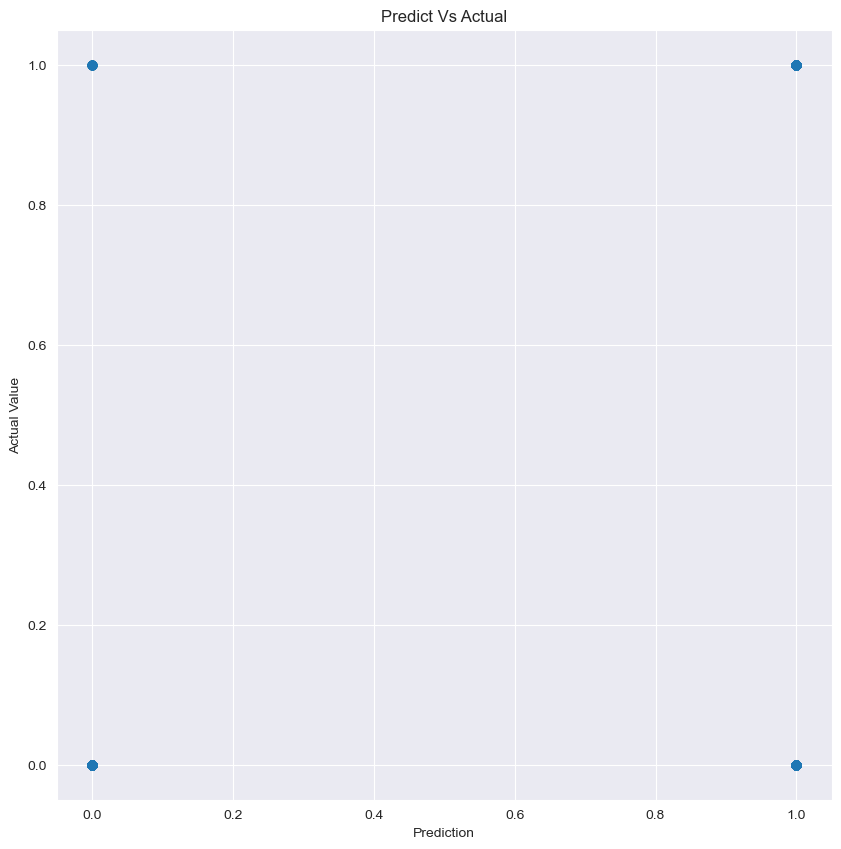

In [50]:
plt.figure(figsize=(10,10))
plt.scatter(train_predict,Y_train)
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.title("Predict Vs Actual")
plt.show();

In [51]:
test_prediction = model.predict(X_test)
test_prediction

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [52]:
accuracy_score(test_prediction,Y_test)

0.9776442307692308

In [54]:
accuracy_score(train_predict,Y_train)

0.9868990384615385